### Import and load dataset

In [28]:
# import libraries and load csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
# Read  dataset
data = pd.read_csv('../data/raw/online_shoppers_intention.csv')

In [30]:
data.shape

(12330, 18)

### Initial dataset checks

In [31]:
# Display the first 5 rows (head)
print("Head of the dataset:")
print(data.head())

Head of the dataset:
   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0

In [32]:
# Data types and non-null counts
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

### Data Cleaning

In [33]:
# Remove duplicate rows
data = data.drop_duplicates()

In [34]:
data.shape

(12205, 18)

In [35]:
# Check for data type consistency
print(data.dtypes)

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object


### Features distribution checks

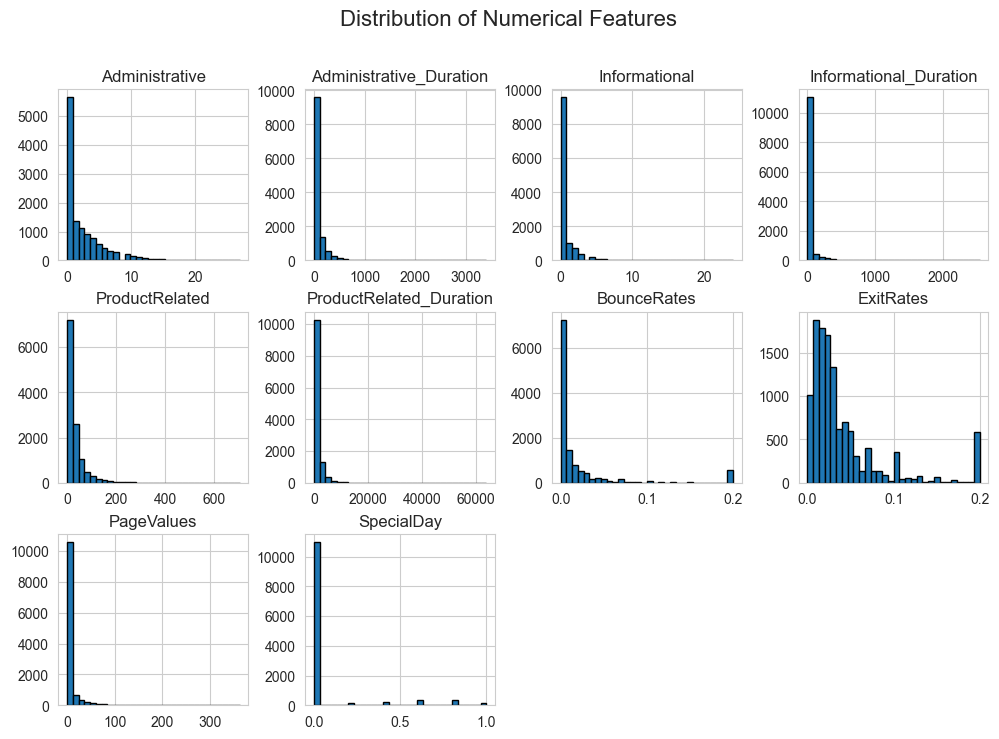

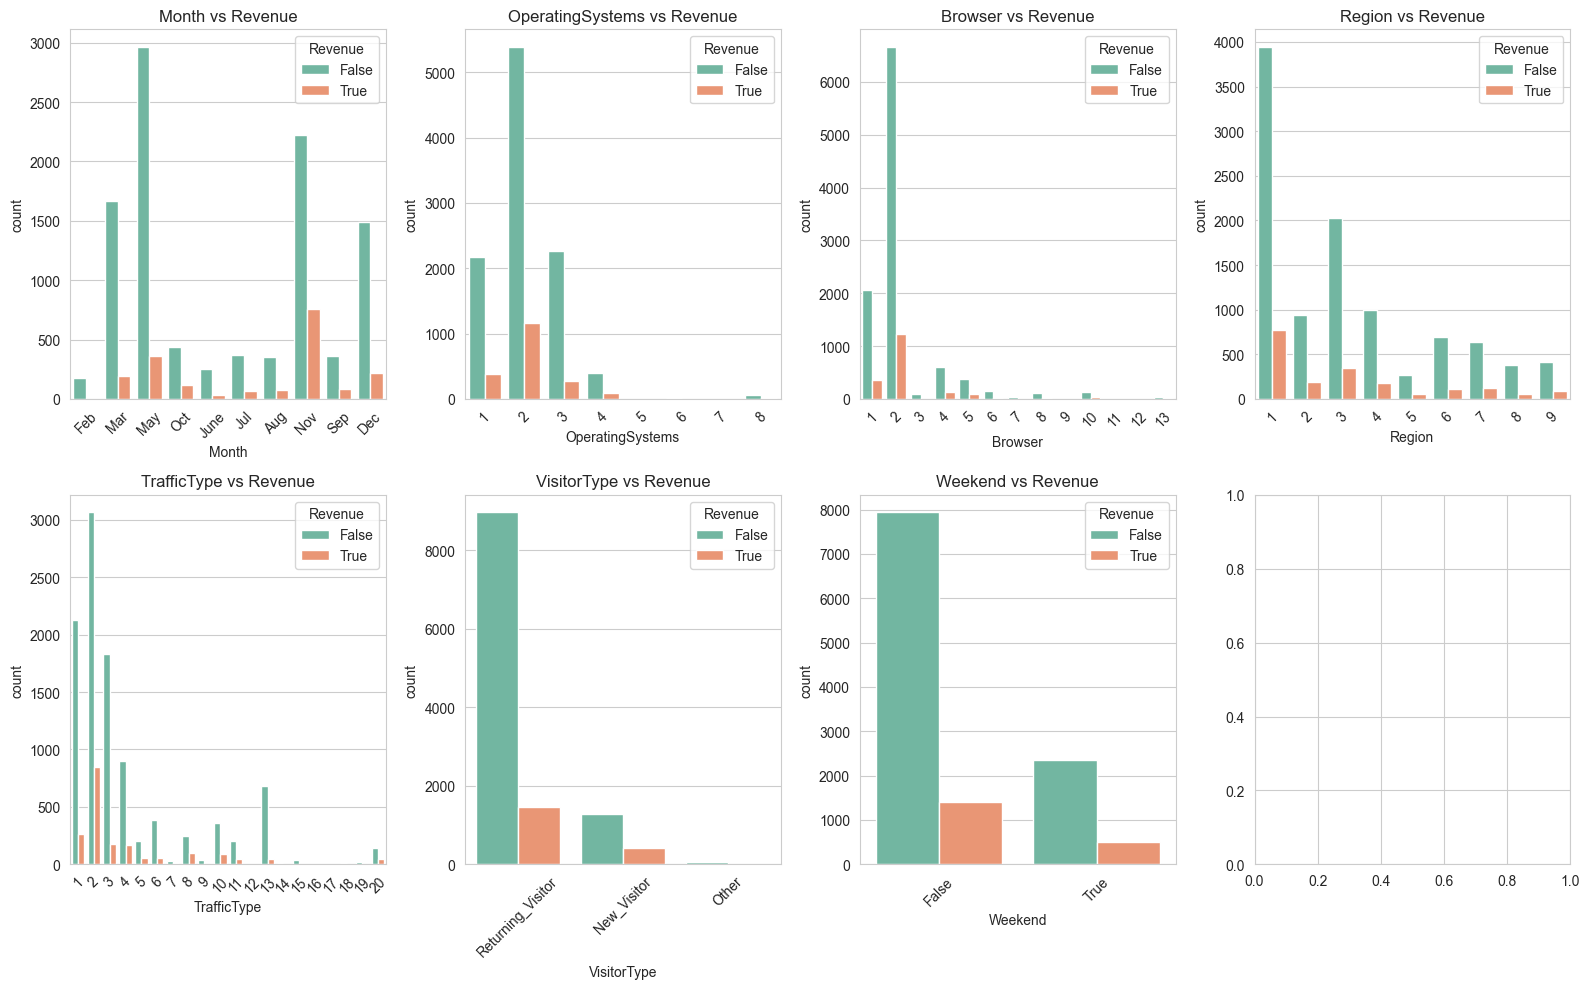

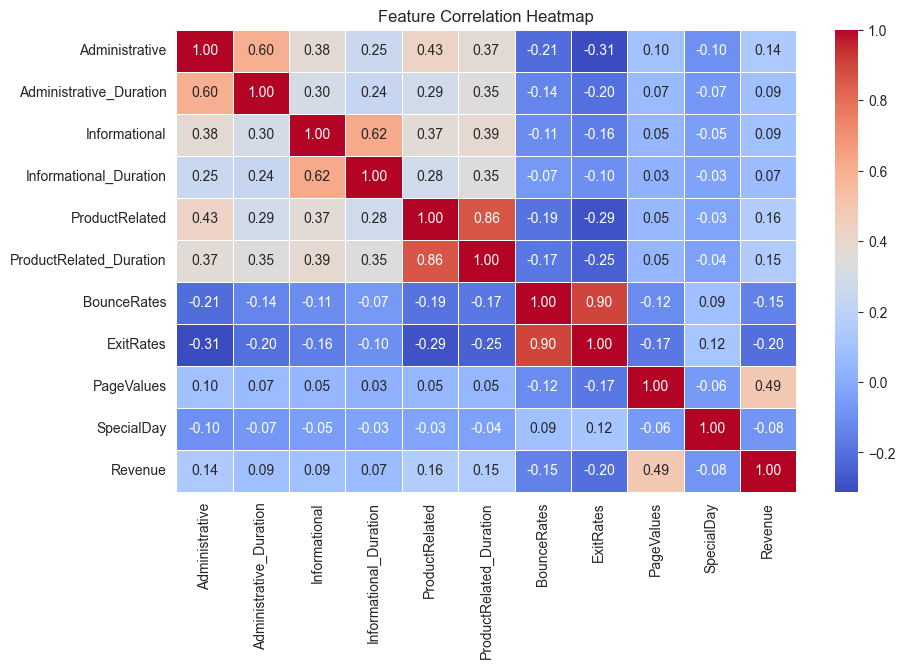

In [36]:
# Set style
sns.set_style("whitegrid")

# Distribution of numerical features
num_cols = [
    "Administrative", "Administrative_Duration", "Informational", "Informational_Duration", 
    "ProductRelated", "ProductRelated_Duration", "BounceRates", "ExitRates", "PageValues", "SpecialDay"
]

data[num_cols].hist(figsize=(12, 8), bins=30, layout=(3, 4), edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.savefig('../Reports/figures/Distribution of numerical features.png', dpi=300, bbox_inches='tight')
plt.show()

# Categorical features count plots
cat_cols = ["Month", "OperatingSystems", "Browser", "Region", "TrafficType", "VisitorType", "Weekend"]
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 10))
axes = axes.flatten()
for i, col in enumerate(cat_cols):
    sns.countplot(data=data, x=col, hue="Revenue", palette="Set2", ax=axes[i])
    axes[i].set_title(f"{col} vs Revenue")
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.savefig('../Reports/figures/Categorical features count plots.png', dpi=300, bbox_inches='tight')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
corr = data[num_cols + ["Revenue"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.savefig('../Reports/figures/Correlation heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

### Data wrangling

In [37]:
# Standardize month names
data["Month"] = data["Month"].str[:3].str.capitalize()

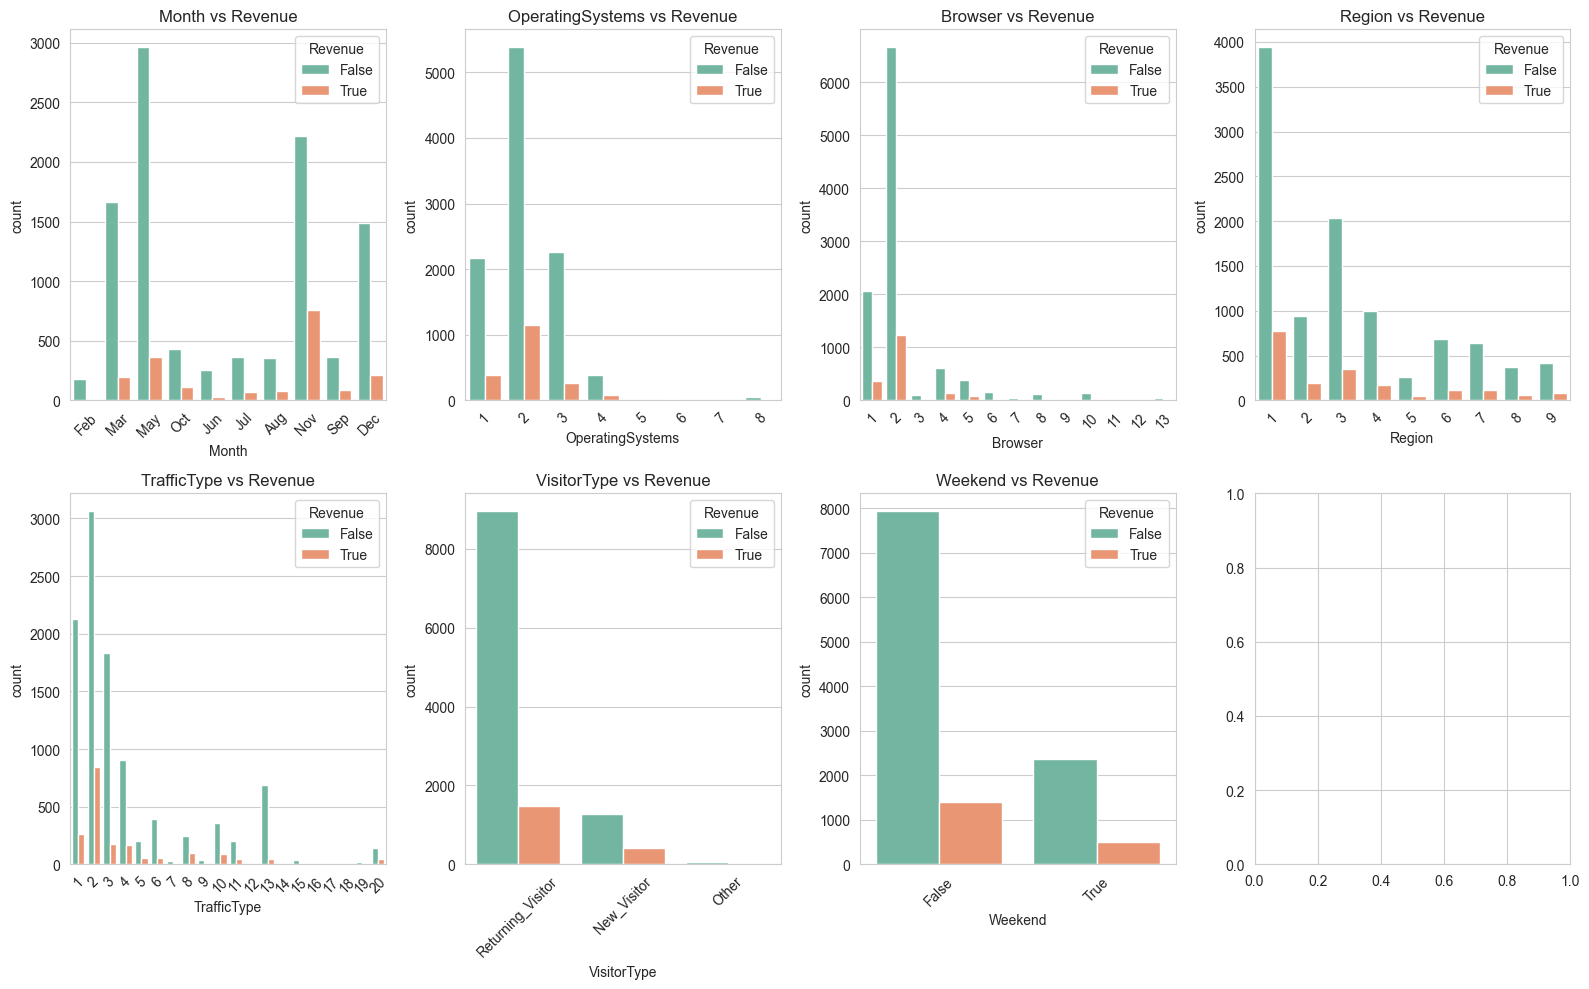

In [38]:
# Categorical features count plots
cat_cols = ["Month", "OperatingSystems", "Browser", "Region", "TrafficType", "VisitorType", "Weekend"]
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 10))
axes = axes.flatten()
for i, col in enumerate(cat_cols):
    sns.countplot(data=data, x=col, hue="Revenue", palette="Set2", ax=axes[i])
    axes[i].set_title(f"{col} vs Revenue")
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

In [39]:
# Trim leading and trailing spaces
data = data.map(lambda x: x.strip() if isinstance(x, str) else x)

In [41]:
# Rename the dataset to data_cleaned
data_cleaned = data

# Save the dataset to the desired location
data_cleaned.to_csv('../data/cleaned/data_cleaned.csv', index=False)

# Confirm the dataset is saved
print("Dataset saved as data_cleaned.csv in the '../data/cleaned' directory.")

Dataset saved as data_cleaned.csv in the '../data/cleaned' directory.


In [40]:
data_cleaned.shape

(12205, 18)